In [1]:
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import savefig

%matplotlib inline

In [2]:
# Source: http://web.mta.info/developers/turnstile.html
#combine the data through the entire year to find a maximum 
def get_data(week_nums):
    url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt"
    dfs = []
    for week_num in week_nums:
        print (week_num)
        file_url = url.format(week_num)
        dfs.append(pd.read_csv(file_url))
    return pd.concat(dfs)
        
week_nums = [170923, 170930, 171007, 171014, 171021, 171028, 171104, 171111, 171118, 171125, 171202, 171209, 171216, 171223, 171230, 180106, 180113, 180120, 180127, 180203, 180210, 180217, 180224, 180303, 180310, 180317, 180324, 180331, 180407, 180414, 180421, 180428, 180505, 180512, 180519, 180526, 180602, 180609, 180616, 180623, 180630, 180707, 180714, 180721, 180728, 180804, 180811, 180818, 180825, 180901, 180908, 180915, 180922]
turnstiles_df = get_data(week_nums)


170923
170930
171007
171014
171021
171028
171104
171111
171118
171125
171202
171209
171216
171223
171230
180106
180113
180120
180127
180203
180210
180217
180224
180303
180310
180317
180324
180331
180407
180414
180421
180428
180505
180512
180519
180526
180602
180609
180616
180623
180630
180707
180714
180721
180728
180804
180811
180818
180825
180901
180908
180915
180922


In [3]:
df = turnstiles_df.copy()

In [4]:
#generate a datetime object
df["DATE_TIME"] = pd.to_datetime(df.DATE + " " + df.TIME, format="%m/%d/%Y %H:%M:%S")

In [5]:

df.sort_values(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True)

In [6]:
df.rename(columns={'ENTRIES': 'cumulative_entries', 'EXITS                                                               ': 'cumulative_exits'}, inplace=True)

In [7]:
df.drop_duplicates(subset=["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True)

In [8]:
# shift the data down one row so can get the previous time point number
df[['pre_CA','preUNIT','Turnstile','pre_date','pre_entries','pre_exits']] = (df[['C/A','UNIT','SCP','DATE_TIME','cumulative_entries','cumulative_exits']].transform(lambda grp: grp.shift(1)))

In [11]:
#create the turnstile_id for the current turnstile

df['Turnstile_id'] = df['C/A'] + ' ' + df['UNIT'] + df['SCP']

In [12]:
#create the turnstile_id for the previous turnstile

df['Turnstile_pre_id'] = df['pre_CA'] + ' ' + df['preUNIT'] + df['Turnstile']

In [13]:
#filter the data to have only the turstile_id mathching with the previous time piont, otherwise it will substract between two
#turstile, and the number is meaningless

df1 = df[df['Turnstile_id'] == df['Turnstile_pre_id']].copy()

In [14]:
#calculate net_entries and net_exits based on the current and previous data point
#create a column net_traffic for the total traffic

df1['net_entries'] = df1['cumulative_entries'] - df1['pre_entries']
df1['net_exits'] = df1['cumulative_exits'] - df1['pre_exits']
df1['net_traffic'] = df1['net_entries'] + df1['net_exits']

In [15]:
df1.dropna(how = 'any').copy()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,cumulative_entries,...,preUNIT,Turnstile,pre_date,pre_entries,pre_exits,Turnstile_id,Turnstile_pre_id,net_entries,net_exits,net_traffic
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/16/2017,04:00:00,REGULAR,6328480,...,R051,02-00-00,2017-09-16 00:00:00,6328434.0,2141537.0,A002 R05102-00-00,A002 R05102-00-00,46.0,4.0,50.0
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/16/2017,08:00:00,REGULAR,6328503,...,R051,02-00-00,2017-09-16 04:00:00,6328480.0,2141541.0,A002 R05102-00-00,A002 R05102-00-00,23.0,39.0,62.0
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/16/2017,12:00:00,REGULAR,6328598,...,R051,02-00-00,2017-09-16 08:00:00,6328503.0,2141580.0,A002 R05102-00-00,A002 R05102-00-00,95.0,94.0,189.0
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/16/2017,16:00:00,REGULAR,6328838,...,R051,02-00-00,2017-09-16 12:00:00,6328598.0,2141674.0,A002 R05102-00-00,A002 R05102-00-00,240.0,57.0,297.0
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/16/2017,20:00:00,REGULAR,6329154,...,R051,02-00-00,2017-09-16 16:00:00,6328838.0,2141731.0,A002 R05102-00-00,A002 R05102-00-00,316.0,48.0,364.0
6,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/17/2017,00:00:00,REGULAR,6329336,...,R051,02-00-00,2017-09-16 20:00:00,6329154.0,2141779.0,A002 R05102-00-00,A002 R05102-00-00,182.0,20.0,202.0
7,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/17/2017,04:00:00,REGULAR,6329364,...,R051,02-00-00,2017-09-17 00:00:00,6329336.0,2141799.0,A002 R05102-00-00,A002 R05102-00-00,28.0,2.0,30.0
8,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/17/2017,08:00:00,REGULAR,6329382,...,R051,02-00-00,2017-09-17 04:00:00,6329364.0,2141801.0,A002 R05102-00-00,A002 R05102-00-00,18.0,20.0,38.0
9,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/17/2017,12:00:00,REGULAR,6329451,...,R051,02-00-00,2017-09-17 08:00:00,6329382.0,2141821.0,A002 R05102-00-00,A002 R05102-00-00,69.0,66.0,135.0
10,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/17/2017,16:00:00,REGULAR,6329655,...,R051,02-00-00,2017-09-17 12:00:00,6329451.0,2141887.0,A002 R05102-00-00,A002 R05102-00-00,204.0,54.0,258.0


In [16]:
#some turstile got reset and resulted in negative number, get rid of that. Some have abnormally high number, need to figure out why?

df2 = df1[(df1.net_entries >0) & (df1.net_exits >0) &(df1.net_entries < 100000) & (df1.net_exits < 100000)]

In [17]:
df2.net_traffic.describe()

count    8.549886e+06
mean     3.672909e+02
std      4.089470e+02
min      2.000000e+00
25%      8.300000e+01
50%      2.370000e+02
75%      5.160000e+02
max      8.462700e+04
Name: net_traffic, dtype: float64

In [18]:
df3= df2.groupby(['STATION','DATE_TIME']).sum().reset_index().copy()

In [19]:
df3['DATE_format'] = pd.to_datetime(df3['DATE_TIME'],format="%m/%d/%Y")

In [20]:
df3['weekday'] = df3['DATE_format'].dt.day_name()

In [21]:
df4= df3.sort_values(by = 'net_traffic', ascending = False).copy()

In [22]:
df5 = df4[df4['net_traffic'] <100000]

In [23]:
df5.head()

,STATION,DATE_TIME,cumulative_entries,cumulative_exits,pre_entries,pre_exits,net_entries,net_exits,net_traffic,DATE_format,weekday
251311,7 AV,2017-09-30 01:00:00,1906508049,850160370,1.906462e+09,8.501127e+08,46517.0,47667.0,94184.0,2017-09-30 01:00:00,Saturday
173149,34 ST-PENN STA,2017-11-07 19:00:00,1718638825,1734624883,1.718602e+09,1.734573e+09,37185.0,52379.0,89564.0,2017-11-07 19:00:00,Tuesday
168448,34 ST-HERALD SQ,2017-12-08 19:00:00,1537573321,1342170792,1.537524e+09,1.342131e+09,49464.0,39529.0,88993.0,2017-12-08 19:00:00,Friday
168499,34 ST-HERALD SQ,2017-12-15 19:00:00,1538321151,1342874496,1.538272e+09,1.342835e+09,49083.0,39890.0,88973.0,2017-12-15 19:00:00,Friday
168523,34 ST-HERALD SQ,2017-12-19 19:00:00,1538699836,1343234071,1.538650e+09,1.343196e+09,50279.0,37882.0,88161.0,2017-12-19 19:00:00,Tuesday


In [24]:
df5['hour'] = df5['DATE_TIME'].apply(lambda x: x.hour)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [31]:
#after identifying a specific time point at 34_HEARLD ST, look into that and see what's the usual or median data should look like.


rush_hour_34_HEARLD = df5[(df5['STATION'] == '34 ST-HERALD SQ') ]
rush_hour_34_HEARLD_friday = rush_hour_34_HEARLD[(rush_hour_34_HEARLD['weekday'] == 'Friday')]

rush_hour_34_HEARLD_friday = rush_hour_34_HEARLD_friday[(rush_hour_34_HEARLD['hour'] == 19)|(rush_hour_34_HEARLD['hour'] == 20)]




/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


In [32]:
rush_hour_34_HEARLD_friday.head()

,STATION,DATE_TIME,cumulative_entries,cumulative_exits,pre_entries,pre_exits,net_entries,net_exits,net_traffic,DATE_format,weekday,hour
168448,34 ST-HERALD SQ,2017-12-08 19:00:00,1537573321,1342170792,1.537524e+09,1.342131e+09,49464.0,39529.0,88993.0,2017-12-08 19:00:00,Friday,19
168499,34 ST-HERALD SQ,2017-12-15 19:00:00,1538321151,1342874496,1.538272e+09,1.342835e+09,49083.0,39890.0,88973.0,2017-12-15 19:00:00,Friday,19
168393,34 ST-HERALD SQ,2017-12-01 19:00:00,1536835164,1341483447,1.536787e+09,1.341446e+09,48173.0,37506.0,85679.0,2017-12-01 19:00:00,Friday,19
169129,34 ST-HERALD SQ,2018-03-16 20:00:00,1536267832,1342054656,1.536218e+09,1.342020e+09,49337.0,34856.0,84193.0,2018-03-16 20:00:00,Friday,20
168174,34 ST-HERALD SQ,2017-10-27 20:00:00,1533420268,1338260859,1.533371e+09,1.338226e+09,49190.0,34984.0,84174.0,2017-10-27 20:00:00,Friday,20


In [33]:
rush_hour_34_HEARLD_friday.net_traffic.describe()

count       53.000000
mean     76228.962264
std       6127.316479
min      59695.000000
25%      73265.000000
50%      76082.000000
75%      81058.000000
max      88993.000000
Name: net_traffic, dtype: float64

In [34]:
median_vs_max_df = pd.read_csv('34_st_hearld_friday_rush_hour.csv')
median_vs_max_df

,STATUS,Traffic
0,Median,76759
1,Max,88993


In [35]:
sns.set()

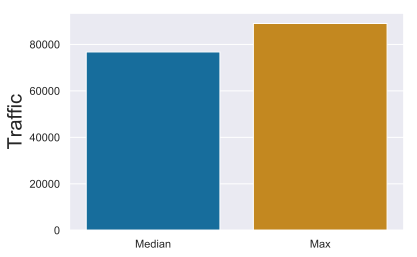

In [36]:
median_max_plot = sns.barplot(x="STATUS", y='Traffic', data=median_vs_max_df, palette=("colorblind"),label = None)
median_max_plot.set_xlabel("")
median_max_plot.set_ylabel('Traffic',size = 20)
%config InlineBackend.figure_format = 'svg'

In [ ]:
import seaborn as sns
from pylab import savefig
sns.set(style="whitegrid")
Population_chart = sns.barplot(x="STATION", y="POPULATION", data=zipCodeData, palette=("colorblind"),label = None)
Population_chart.set_xticklabels(zipCodeData.STATION,rotation= 90)
Population_chart.set_xlabel("")
Population_chart.set_ylabel('POPULATION',size = 20)
Population_chart2 =Population_chart.twinx()
fig = zipCodeData.plot(x="STATION", y="NETTRAFFIC", ax=Population_chart2, legend=True, color="black",grid=False, linewidth = 5)

#%config InlineBackend.figure_format = 'jpeg'
figure = fig.get_figure()    
figure.savefig('polulation_station.jpeg', dpi= 3000, bbox_inches='tight')

#sns.set_context("poster")
#sns.set_context("poster", font_scale= 1)
